In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# Training Models

* **Closed Form equation :** directly computes the model parameters that best fit the model to the training set 


* **Iterative optimization approach :** called Gradient Descent that gradually tweaks the model parameters to minimize the cost functionover the training set

## Linear Regression Model

<h2>$\hat{y} = h_{\theta}(x) = \theta^T . x $</h2>

with :  
$\theta$ : model's parameter vector  
$\theta^T$ : transpose of  $\theta$  
$x$ : instance's feature vector  
$h_{\theta}$ : hypothesis function

The model is parametrized by the vector $\theta$

### The normal Equation - (closed form equation)

To find the value of $\theta$ that minimizes the cost function, there is a <i>closed-form solution</i> - in other words, a mathematical equation that gives the result directly. Called the **Normal Equation**.

<h2>$\hat{\theta} = (X^T.X)^{-1}.X^T.y$</h2>

with :  
$\hat{\theta}$ : value of $\theta$ that minimizes the cost function  
**y** : is the vector of target values containing y1 to ym

(0.0, 2.0, 0.0, 15.0)

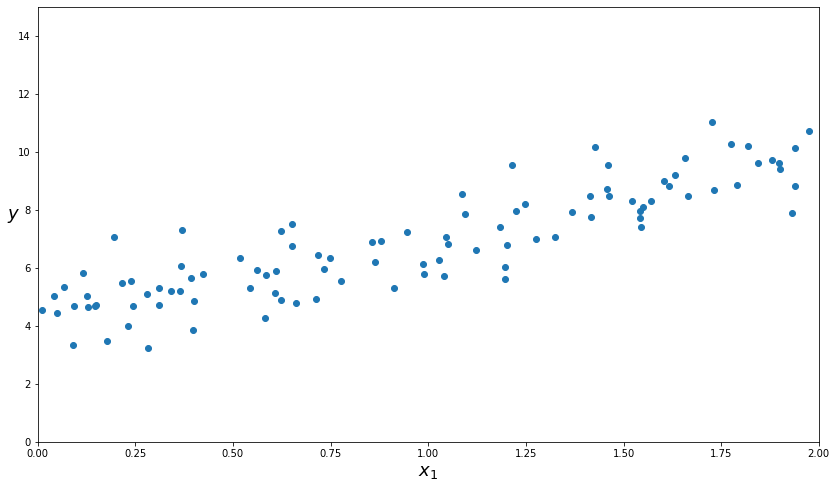

In [3]:
# generate linear looking data to test the equation
X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.randn(100,1) # 4x + 3 + gaussian noise

plt.figure(figsize=(14,8))
plt.scatter(X,y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])


In [4]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $\theta_0$ = 4 and $\theta_1$ = 3. But instead we got 4.215 and 2.77, cause of the noise that made it impossible to recover the exact parameters of the original function.

We make predictions using $\theta_0$ :

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Plotting the model's prediction :

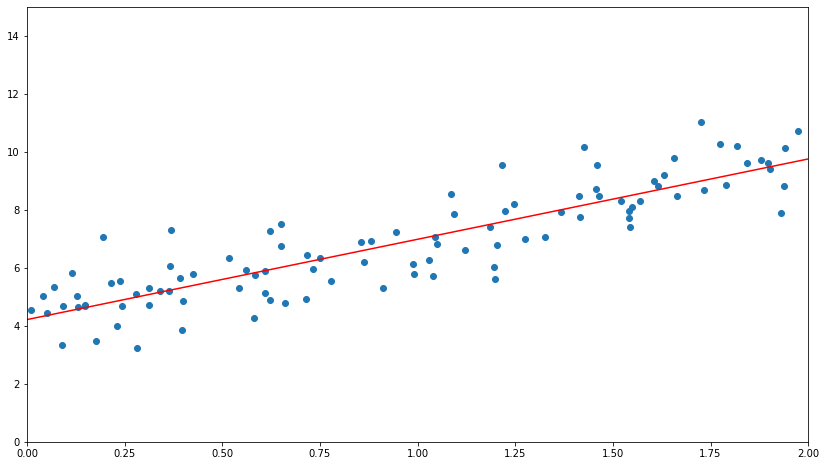

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(X,y)
plt.axis([0, 2, 0, 15])
plt.plot(X_new,y_predict,color='red')

In [8]:
# EQUIVALENT CODE USING SCIKIT LEARN
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print()
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]

[[4.21509616]
 [9.75532293]]


### Gradient Descent - (Iterative optimization approach)

Partial derivatives of the cost function :  

<h3>$ \frac{\delta}{\delta\theta_j} = \frac{2}{m}\sum \limits_{i=1}^m (\theta^T.x^{(i)}-y^{(i)})x_{j}^{(i)}$</h3>

**N.B :** Gradient Descent scales well with the number of features; training a Linear Regression model whent there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation

In [9]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta -eta * gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

=> Found the same result as the Normal Equation

* Plot  Different learning rates eta : too low, ideal, too high

In [11]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

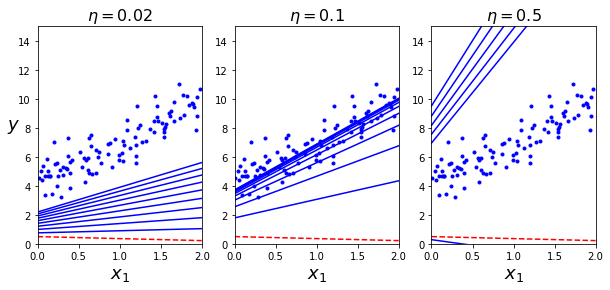

In [12]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

### Stochastic Gradient Descent

The main probelm with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.  
At the opposite extreme <i>Stochastic Gradient Descent</i> just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes the alorithm much faster since it has very little data to manipulate at every iteration. Making it possible to train on huge training sets.  
On the other hand, due to its stochastic nature, this algorithm is much less regular : instead of gently descreasing until ut reaches the minimum, the cost function will bounce up an down, decresing only on average. Over time it will end up very close to the minimum , but once it gets there i will continue to bounce around, never settling down. So once the algorithm stops, the final paramater values are good nut not optimal.  


When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Descent has a better chance of finding the global minimum than Batch Gradient Descent.  
Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution is to gradually reduce the learning rate. <i>**simulated annealing**</i>. 

The function that determines the learning rate at each iteration is called the <i>**learning schedule**</i>. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for along time and end up with a suboptimal solution if you halt training too early.

* Code implements Stochastic Gradient Descent using a simple learning schedule :

In [13]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

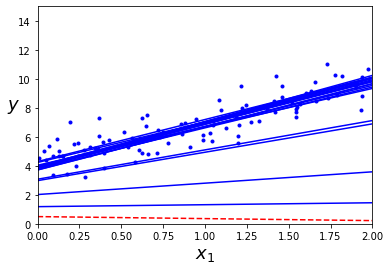

In [14]:
n_epochs = 50
t0, t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style ="b-" if i>0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

* ScikitLearn version :

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

### Mini-batch Gradient Descent

Mini-batch Gradient Descent computes the gradients on small random sets of instances called mini-batches. The main advantage of mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization matrix operations, especially when using GPUs.  
Mini Batch GD will end up walking around a bit closer to the minimum than SGD, but on the other hand it may be harder for it to escape local minima.

* Mini Batch Gradient Descent code :

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[4.25214635],
       [2.7896408 ]])

* **Visualization of Gradient Descent alternatives**

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

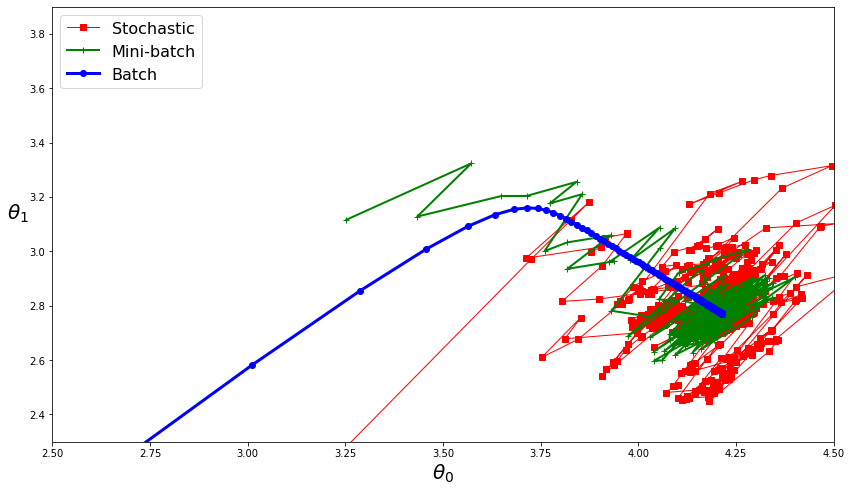

In [21]:
plt.figure(figsize=(14,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

In [22]:
# !!! TODO : Comparative table of GD 

## Polynomial Regression

In [23]:
np.random.seed(42)

In [24]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

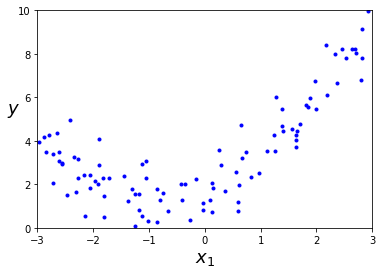

In [25]:

plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

* Polynomial distribution

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

- Filling a linear regression model using the polynomial model for plotting

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

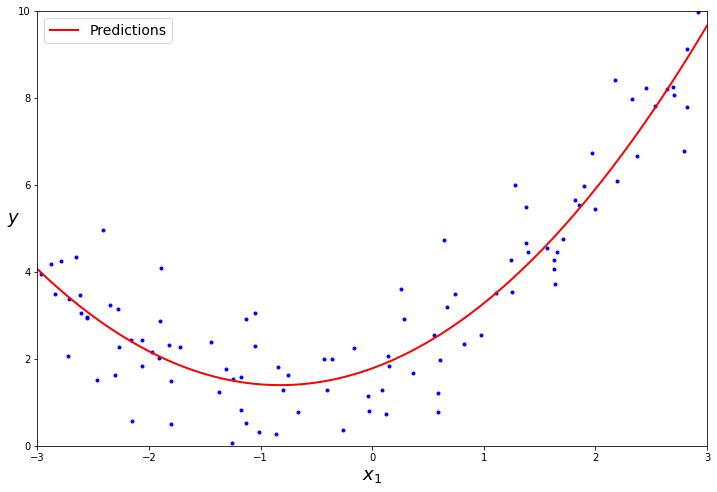

In [29]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(12,8))
plt.plot(X,y,"b.")
plt.plot(X_new, y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$", rotation=0, fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

=> the model estimates $\hat{y} = 0.56{x_1}^2 + 0.93{x_2} + 1.78$  
when the function was : $y = 0.5{x_1}^2+1.0{x_1}+2.0+Gaussian \space noise$

### Learning Curves

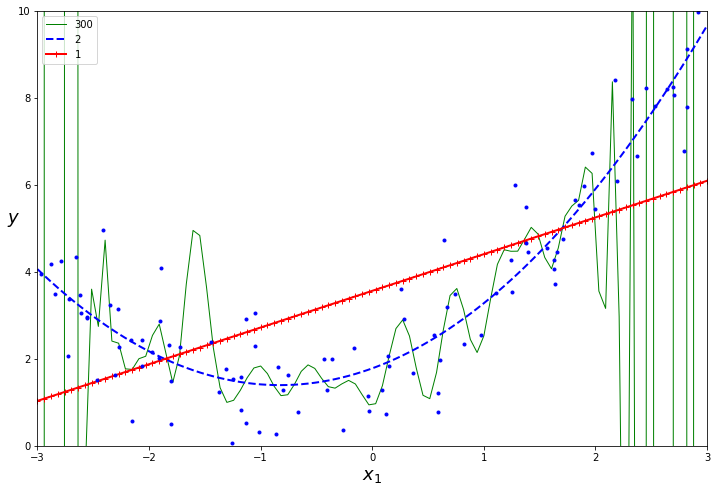

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(12,8))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

if a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then the model is overfitting.

**learning curves :** plots of the model's performance on the training set and the validation set as a function of the training set size.

**chat gpt** : In the context of machine learning, a learning curve is a graphical representation that shows how the performance of a model improves or stabilizes as the amount of training data increases. It provides insights into the relationship between the size of the training set and the model's predictive accuracy or error.

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.figure(figsize=(12,8))    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)    

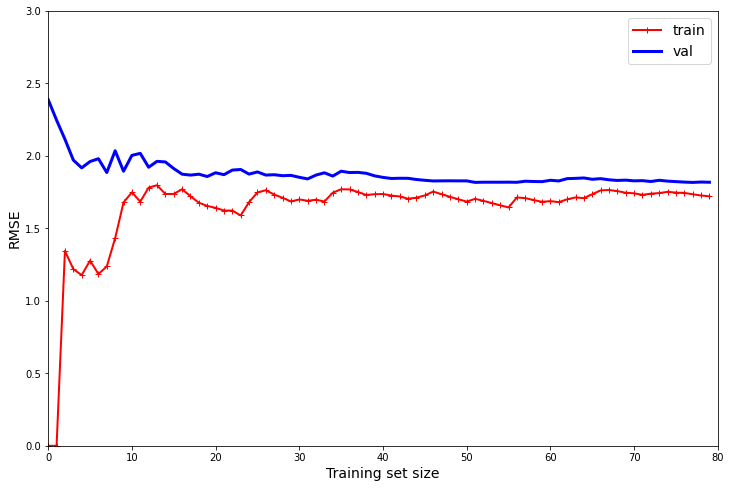

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])             
plt.show()  

=> The learning curves are typical of an underfitting model. Both curves have reached plateau; both are fairly high.

* learning curve of a 10th degree polynomial model on the same data :

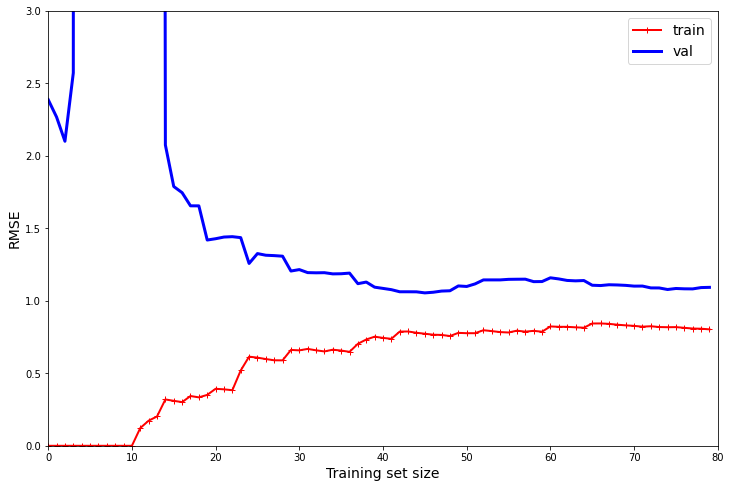

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),('lin-reg',LinearRegression())
])
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3])
plt.show() 

=> model performaing significantly better on the training data than on the validation one, which is the sign of an overfitting model.  
If we used a much larger training set, the 2 curves would continue to get closer.

**N.B** : A way to improve an overfitting model is to feed it more training daa until the validation error reaches the training error.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (constraint it) : the fewer degrees of freedom it has, the harder it will be for it to overfit the data. ( a simple way to regularize a polynomial model is to reduce the number of polynomial degrees).

For **linear model** regularization is typically achieved by constraining the weights of the model:
* Ridge Regression
* Lasso Regression
* Elastic Net

### Ridge Regression - (Tikhonov regularization)

**Ridge Regression :** a regularization term equal $\alpha \sum \limits_{i=1}^n \theta_i^2 $ is added to the cost function.  
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.  
The regularization term should only be added to the cost function during training. Once the model is trained, you evaluate the model's performance using the unregularized performance measure.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If alpha = 0, then Ridge Regression is just Linear Regression. If it's very large, all weights end up very close to zero and the result is a flat line going through the data's mean.

- Ridge Regression cost function :
<h4>$J(\theta) = MSE(\theta) + \alpha \sum \limits_{i=1}^n \theta_i^2$</h4>

In [34]:
np.random.seed(42)
m = 20
X = 3 * np.random.randn(m,1)
y = 1 + .5 * X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [35]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.49580043]])

In [36]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.49524834]])

* Plotting several Ridge models trained on some linear data using different alpha values.  
On the left plain ridge models, leading to linear predictions.  
On the right data is expanded using polynomial features(degree=10), then scaled and finally ridge model applied

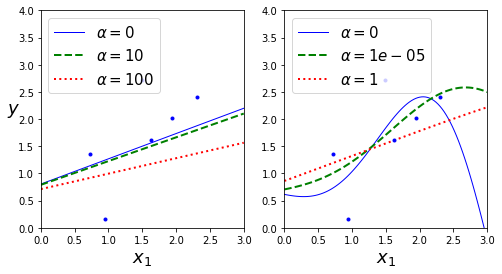

In [37]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

As with Linear Regression we can perform Ridge Regression eiher by computing **cloed form equation** or **Gradient Descent**

* Ridge Regression using a closed form solution

In [39]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.49580043]])

* Stochastic Gradient Descent 

In [41]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.37106821])

### Lasso Regression

**Least Absolute Shrinkage and Selection Operator Regression** uses the l1 norm of the weight vector instead of half of the square of l2

* Lasso Regression Cost function  
<h4>$J(\theta) = MSE(\theta) + \alpha \sum \limits_{i=1}^n |{\theta_i}|$</h4>

**Chat gpt** : Lasso regression, also known as L1 regularization or L1-penalized regression, is a linear regression technique that incorporates regularization to prevent overfitting and perform feature selection. It adds a penalty term to the linear regression objective function, encouraging the model to have smaller coefficients and, in some cases, exactly zero coefficients for some features.

In [44]:
from sklearn.linear_model import Lasso

c:\users\marwane\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.890e+00, tolerance: 4.176e-03
  model = cd_fast.enet_coordinate_descent(


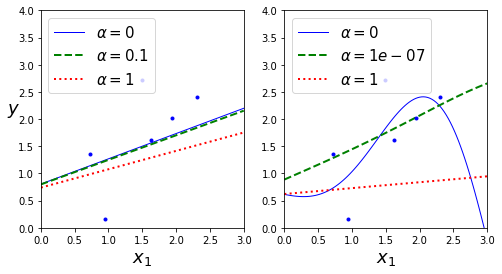

In [45]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()


Lasso tends to completely eliminiate the the weights of the least important features.

In [46]:
# Scikit learn example 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.47614517])

### Elastic Net

Elastic Net is a regression technique that combines L1 regularization (Lasso) and L2 regularization (Ridge) in a linear regression model. It is designed to address some of the limitations of Lasso and Ridge regression by offering a flexible regularization approach.

* Elastic Net cost function 

<h3>$J(\theta) = MSE(\theta) + \alpha \sum \limits_{i=1}^n |{\theta_i}| + \frac{1-r}{2}\alpha \sum \limits_{i=1}^n \theta_i^2$</h3>  
  
with r the mix ratio

In [47]:
# Scikit learn example 
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.48310271])

**=> What type of regularization to use ?**  
It is almost always preferable to have at least a little bit of regularization. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic.  
  
In general Elastic is preferred over Lasso since Lasso may behave erratically when the number of features igreater than the number of training instances or when several features are strongly correlated.

### Early Stopping

A different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called **<i>early stopping</i>**

In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(),  test_size=0.5, random_state=10)

In [49]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

* create graph

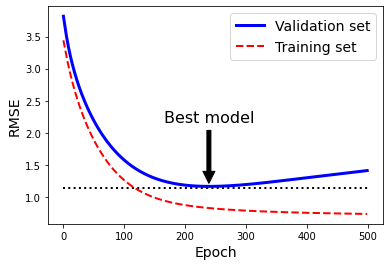

In [51]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

## Logistic Regression

commonly used to estimate the probability that an instance belongs to a particular class.

### Estimating probabilities

just like a linear regression model, Logistic regression model computes a weighted sum of the input features (plus bias term) but instead of outputting the result directly like the Linear Regression, it outputs the <i>logistic</i> of the results

* Logistic Regression model estimated probability (vectorized form)  

<h3>$\hat{p} = h_\theta(x) = \sigma(\theta^T.x)$</h3>

* Logistic function

<h2> $\sigma(t) = \frac{1}{1+e^{-t}}$ </h2>

(-10.0, 10.0, -0.1, 1.1)

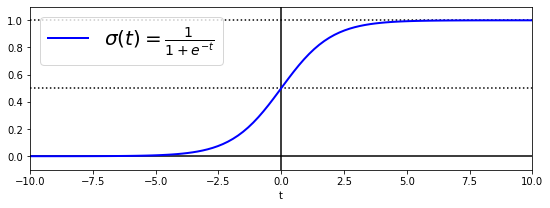

In [59]:
t = np.linspace(-10,10,100)
sig = 1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])